In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

In [40]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
km = KMeans(3)

In [14]:
#km.fit :적합만 함
y = km.fit_predict(X)#적합+라벨 결과, 할 때마다 결과 다름.
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [15]:
sum(Y == y)/len(Y)#정확도

0.8933333333333333

In [25]:
km.fit(X)#적합

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
km.labels_#라벨

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
acc = sum(Y == y)/len(Y)

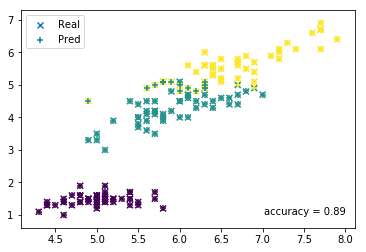

In [28]:
plt.scatter(X[:,0],X[:,2],c = Y, marker = 'x', label = 'Real')
plt.scatter(X[:,0],X[:,2],c = y, marker = '+', label = 'Pred')
plt.text(8.,1.,'accuracy = %.2f'%acc, horizontalalignment = 'right')
plt.legend()

In [29]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)

In [30]:
X = df2.values
Y = df.Survived.values

In [31]:
km = KMeans(2)
km.fit(X)
y = km.labels_

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(2)

In [33]:
x = tsne.fit_transform(X)

In [34]:
a,b = zip(*x)

In [35]:
acc = sum(Y == y)/len(Y)

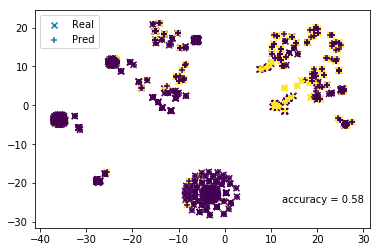

In [39]:
plt.scatter(a,b,c = Y, marker = 'x', label = 'Real')
plt.scatter(a,b,c = y, marker = '+', label = 'Pred')
plt.text(30.,-25.,'accuracy = %.2f'%acc, horizontalalignment = 'right')
plt.legend()

In [41]:
#엘보우 기법 : 중점이 많아 질 때 확연히 꺽기는 점(엘보우)이 있어야 적합한 모델, 타이타닉보다 아이리스에 적합함.
err = []
for k in range(2,10):
    km = KMeans(k)
    km.fit(X)
    err.append(km.inertia_)#km.inertia : 군집 중점으로부터 각 점까지의 편차

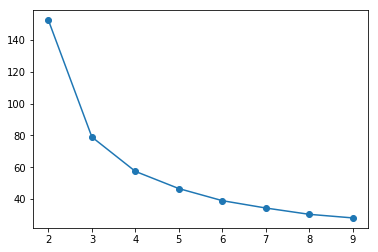

In [42]:
plt.plot(np.arange(2,10),err, '-o')

In [1]:
### 계층적 군집

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

from sklearn.cluster import AgglomerativeClustering as AggC

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
ag = AggC(3)

In [5]:
y = ag.fit_predict(X)

In [6]:
def matching(__Y,__y):
    from itertools import permutations
    __len = len(set(__Y))
    __acc = -1.
    __ans = np.arange(__len)
    
    for __name in list(permutations(set(__y),__len)):#가능한 순열 집합, 현재 ag 인수가 3이니 (0,1,2)로 만들 수 있는 순열 집합
        __name = np.array(__name)
        __t_acc = sum(__Y == __name[__y])/len(__Y)
        if __t_acc > __acc:
            __acc = __t_acc
            __ans = __name
    return __acc, __ans

In [7]:
acc, y_map = matching(Y,y)

In [8]:
y_map[y]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [9]:
for link in ["ward", "complete", "average"]:
    ag = AggC(3, linkage=link)
    y = ag.fit_predict(X)
    acc, y_map = matching(Y,y)
    print(link, "%.2f"%acc)

ward 0.89
complete 0.84
average 0.91


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

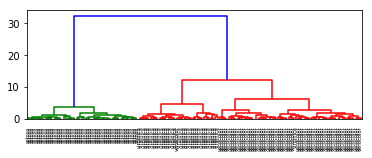

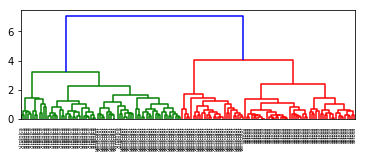

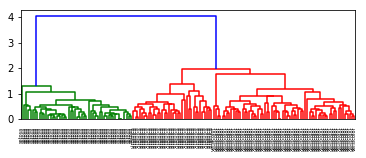

In [11]:
for meth in ["ward", "complete", "average"]:
    link = linkage(X,method=meth)
    plt.figure(figsize=(6,2))
    dendrogram(link,labels=iris.target_names[y_map[y]])
    # plt.ylim([0,0.8])
    plt.show()

In [12]:
fcluster(link,3,criterion='distance')#클러스터 라벨링

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [17]:
?fcluster

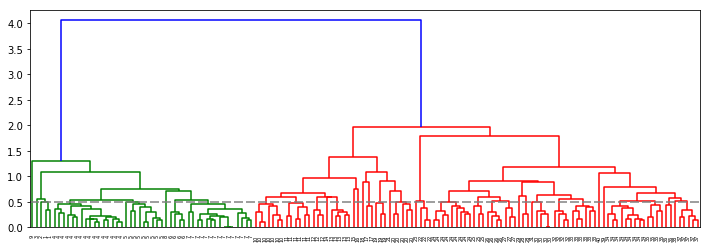

In [13]:
link = linkage(X,method=meth)
thresh = .5
label = fcluster(link,thresh,criterion='distance')

plt.figure(figsize=(12,4))
dendrogram(link,labels=label)
plt.axhline(thresh,c = 'grey', dashes = [6,2])
# plt.ylim([0,0.8])
plt.show()

In [14]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)

In [15]:
X = df2.values
Y = df.Survived.values

In [16]:
for link in ["ward", "complete", "average"]:
    ag = AggC(2, linkage=link)
    y = ag.fit_predict(X)
    acc, y_map = matching(Y,y)
    print(link, "%.6f"%acc)

ward 0.576880
complete 0.608305
average 0.608305


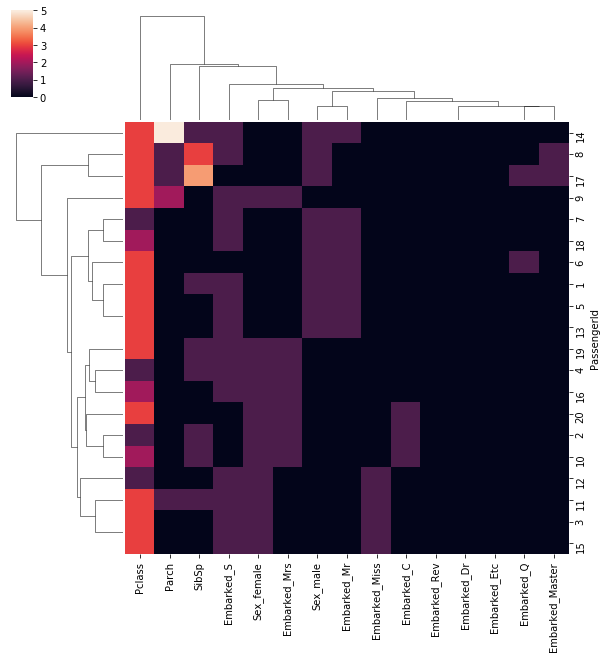

In [19]:
sns.clustermap(df2.loc[:20,:])

In [21]:
### GMM
#MM : 여러 분포의 데이터가 합쳐져 있음
#gmm : 여러 정규분포가 합쳐져 있음, 각 분포를 찾아 군집함

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
style.use('default')

from sklearn import mixture

In [23]:
def matching(__Y,__y):
    from itertools import permutations
    __len = len(set(__Y))
    __acc = -1.
    __ans = np.arange(__len)
    
    for __name in list(permutations(set(__y),__len)):
        __name = np.array(__name)
        __t_acc = sum(__Y == __name[__y])/len(__Y)
        if __t_acc > __acc:
            __acc = __t_acc
            __ans = __name
    return __acc, __ans

In [25]:
m1, s1 = 0,1
m2, s2 = 5,2
m3, s3 = 10,5
n = 100000
x1 = np.random.normal(m1,s1,n)#정규분포 만들기
x2 = np.random.normal(m2,s2,n)
x3 = np.random.normal(m3,s3,n)

alp = .5
bins = 30

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3,1)

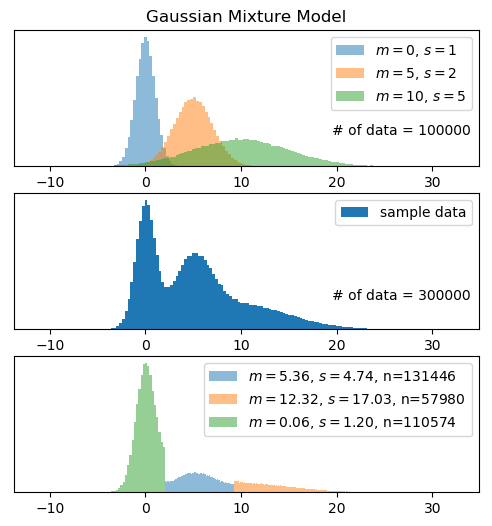

In [28]:
plt.figure(figsize=(6,6))
ax = plt.subplot(gs[0,0])
ax.set_title('Gaussian Mixture Model')
ax.hist(x1, s1*bins, alpha = alp, label = '$m=%d$'%m1+', $s=%d$'%s1)
ax.hist(x2, s2*bins, alpha = alp, label = '$m=%d$'%m2+', $s=%d$'%s2)
ax.hist(x3, s3*bins, alpha = alp, label = '$m=%d$'%m3+', $s=%d$'%s3)
ax.text(34,2500,'# of data = %d'%n, ha = 'right', va = 'bottom')
ax.set_yticks([])
plt.legend()

x = np.array([x1,x2,x3]).reshape(n*3,)
ax = plt.subplot(gs[1,0])
ax.hist(x,bins*s3, label = 'sample data')
ax.set_yticks([])
ax.text(34,2500,'# of data = %d'%(n*3), ha = 'right', va = 'bottom')
plt.legend()

gmm = mixture.GaussianMixture(n_components=3)
X = x.reshape(n*3,1)
gmm.fit(X)
y = gmm.predict(X)

ax = plt.subplot(gs[2,0])
for i in range(3):
    m = gmm.means_[i]
    s = gmm.covariances_[i]
    xt = x[y==i]
    n_ = len(xt)
    ax.hist(xt, int(s)*bins, alpha = alp, label = '$m=%.2f$'%m+', $s=%.2f$'%s+', n=%d'%n_)
plt.legend()
ax.set_yticks([])

plt.show()

In [29]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [30]:
gmm = mixture.GaussianMixture(n_components=3)

In [31]:
gmm.fit(X)
y = gmm.predict(X)
acc, y_n = matching(Y,y)
acc

0.9666666666666667

In [32]:
bgmm = mixture.BayesianGaussianMixture(n_components=10)
bgmm.fit(X)
y = bgmm.predict(X)
set(y)

{0, 1, 2, 3, 4, 5}

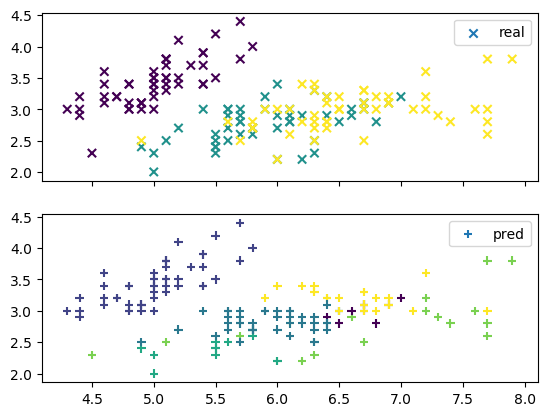

In [33]:
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(X[:,0],X[:,1], c = Y,marker = 'x', label = 'real')
axarr[0].legend()
axarr[1].scatter(X[:,0],X[:,1], c = y,marker = '+', label = 'pred')
axarr[1].legend()

In [34]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)

In [35]:
X = df2.values
Y = df.Survived.values

In [36]:
gmm = mixture.GaussianMixture(n_components=2)

In [37]:
gmm.fit(X)
y = gmm.predict(X)
acc, y_n = matching(Y,y)
acc

0.7048260381593715